<center><h1>EDA on Avocado Prices</h1></center>

<span style="font-size:18px;">In this notebook, my aim is to perform a simple EDA on the Avocado Prices dataset with a step-by-step explanation. Before that, let me give a short description on EDA.</span>

<span style="font-size:18px;font-weight:bold">What is EDA?<span>

<span style="font-size:18px;">EDA stands for Exploratory Data Analysis (EDA). It is used to analyze and summarize datasets to gain a better understanding of its characteristics. This can be done using different statistical techniques and graphical visualizations.</span>

<span style="font-size:18px;font-weight:bold">What data are we exploring today?<span>

<span style="font-size:18px;">I will be performing EDA on the **Avocado Prices** dataset which can be downloaded from __[here](https://www.kaggle.com/datasets/neuromusic/avocado-prices)__. This dataset contains 18,428 rows and 14 columns. Below, you can find the description of each column in the dataset.</span>

* <span style="font-size:18px;">`Date` - The date of the observation.</span>
* <span style="font-size:18px;">`AveragePrice` - the average price of a single avocado</span>
* <span style="font-size:18px;">`Total Volume` - Total number of avocados sold</span>
* <span style="font-size:18px;">`4046` - Total number of avocados with PLU 4046 sold</span>
* <span style="font-size:18px;">`4225` - Total number of avocados with PLU 4225 sold</span>
* <span style="font-size:18px;">`4770` - Total number of avocados with PLU 4770 sold</span>
* <span style="font-size:18px;">`Total Bags` - Total number of bags</span>
* <span style="font-size:18px;">`Small Bags` - Total number of Small bags</span>
* <span style="font-size:18px;">`Large Bags` - Total number of Large bags</span>
* <span style="font-size:18px;">`XLarge Bags` - Number of XLarge bags</span>
* <span style="font-size:18px;">`type`- conventional or organic</span>
* <span style="font-size:18px;">`year` - the year</span>
* <span style="font-size:18px;">`Region` - the city or region of the observation</span>

<span style="font-size:15px;">
<div class="alert alert-block alert-danger">
<b>Note:</b> These were the details of the dataset as of 05/10/2023 (when this notebook was published). The dataset is subject to changes (addition of new rows/columns) in the future.
</div>
<span>


## 1. Import Libraries
<span style="font-size:18px;">Below are the libraries that are used in order to perform EDA (Exploratory data analysis) </span>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
import scipy.stats as stats
from collections import Counter
from sklearn.preprocessing import PowerTransformer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/avocado-prices/avocado.csv


## 2. Load data into Data frame

In [2]:
df = pd.read_csv("../input/avocado-prices/avocado.csv")
# To display the top 5 rows 
df.head(5)    

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.tail(5)                        # To display the botton 5 rows

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

## 3. Data Cleaning

<span style="font-size:18px;">Most datasets we deal with are not clean. Or in other words, the data is either incorrect, incomplete or inconsistent - which does not make it fit for performing data analysis. We can clean the dataset by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.</span>

### 3.1 Dropping irrelevant columns
<span style="font-size:18px;">There aren't too many columns in the dataset, and I find most columns relevant except for the `Unnamed:0` and `Date` columns. So I'm going to drop it.<span>

In [5]:
dfs = df.copy()
df = df.drop(["Unnamed: 0","Date"],axis=1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### 3.2 Renaming columns

<span style="font-size:18px;">There are a few columns which have a space between them. So I will replace the space with an underscore `(_)`</span>

In [6]:
df.columns = [c.replace(' ', '_') for c in df.columns]
for col in df.columns:
    print(col)

AveragePrice
Total_Volume
4046
4225
4770
Total_Bags
Small_Bags
Large_Bags
XLarge_Bags
type
year
region


### 3.3 Dropping missing values

<span style="font-size:18px;">Next, I'll checking whether the dataset contains any missing values or not.</span>

<AxesSubplot:>

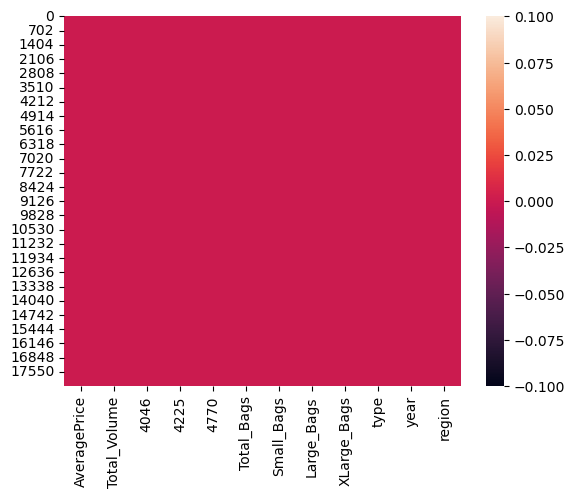

In [7]:
sns.heatmap(df.isnull())

<span style="font-size:18px;">The heatmap confirms there are <ins>no missing values.</ins></span>

In [8]:
print(df.isnull().sum())

AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64


In [9]:
n_cols = ["AveragePrice", "Total_Volume", "4046", "4225", "4770","Total_Bags", "Small_Bags", "Large_Bags", "XLarge_Bags"]    

### 3.4 Outlier Detection and Removal

<span style="font-size:18px;">Outliers are extreme values that differ significantly from the observations. First, I'll drop the categorical and discrete variables which I won't be using for outlier detection.</span>

In [10]:
df2 = df.drop(["type","region","year"],axis=1)
numeric_columns = df2.columns
numeric_columns

Index(['AveragePrice', 'Total_Volume', '4046', '4225', '4770', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge_Bags'],
      dtype='object')

<span style="font-size:18px;">I created an `outlier_count()` function which iterates through each column in the dataset and counts the number of outliers.</span>

In [11]:
def outliers_count(df):
#     df = df.iloc[:, : 8]
    out=[]
    outlier_count=0
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_thresh = q1 - (1.5 * iqr)
    upper_thresh = q3 + (1.5 * iqr)
    
    for i in df:
        if (i > upper_thresh).any() or (i < lower_thresh).any():
            out.append(i)
            outlier_count+=1
    return len(out)
    
outlier_before=[]
for col in range(9):
    outlier_before.append(outliers_count(df[numeric_columns[col]]))
    
#to create dataframe
zipped_list1 = list(zip(numeric_columns, outlier_before))  # zip the two lists together
result_list1 = [[item[0], item[1]] for item in zipped_list1]  # create a list of lists
df_before =  pd.DataFrame(result_list1, columns=["Column", "No. of outliers"])
df_before.reset_index(drop=True, inplace=True) 
df_before

,Column,No. of outliers
0,AveragePrice,209
1,Total_Volume,2297
2,4046,2518
3,4225,2519
4,4770,2918
5,Total_Bags,2533
6,Small_Bags,2407
7,Large_Bags,2707
8,XLarge_Bags,4014


<span style="font-size:18px;">A boxplot will help us <span style="text-decoration:underline">visualize the outliers within each column</span>

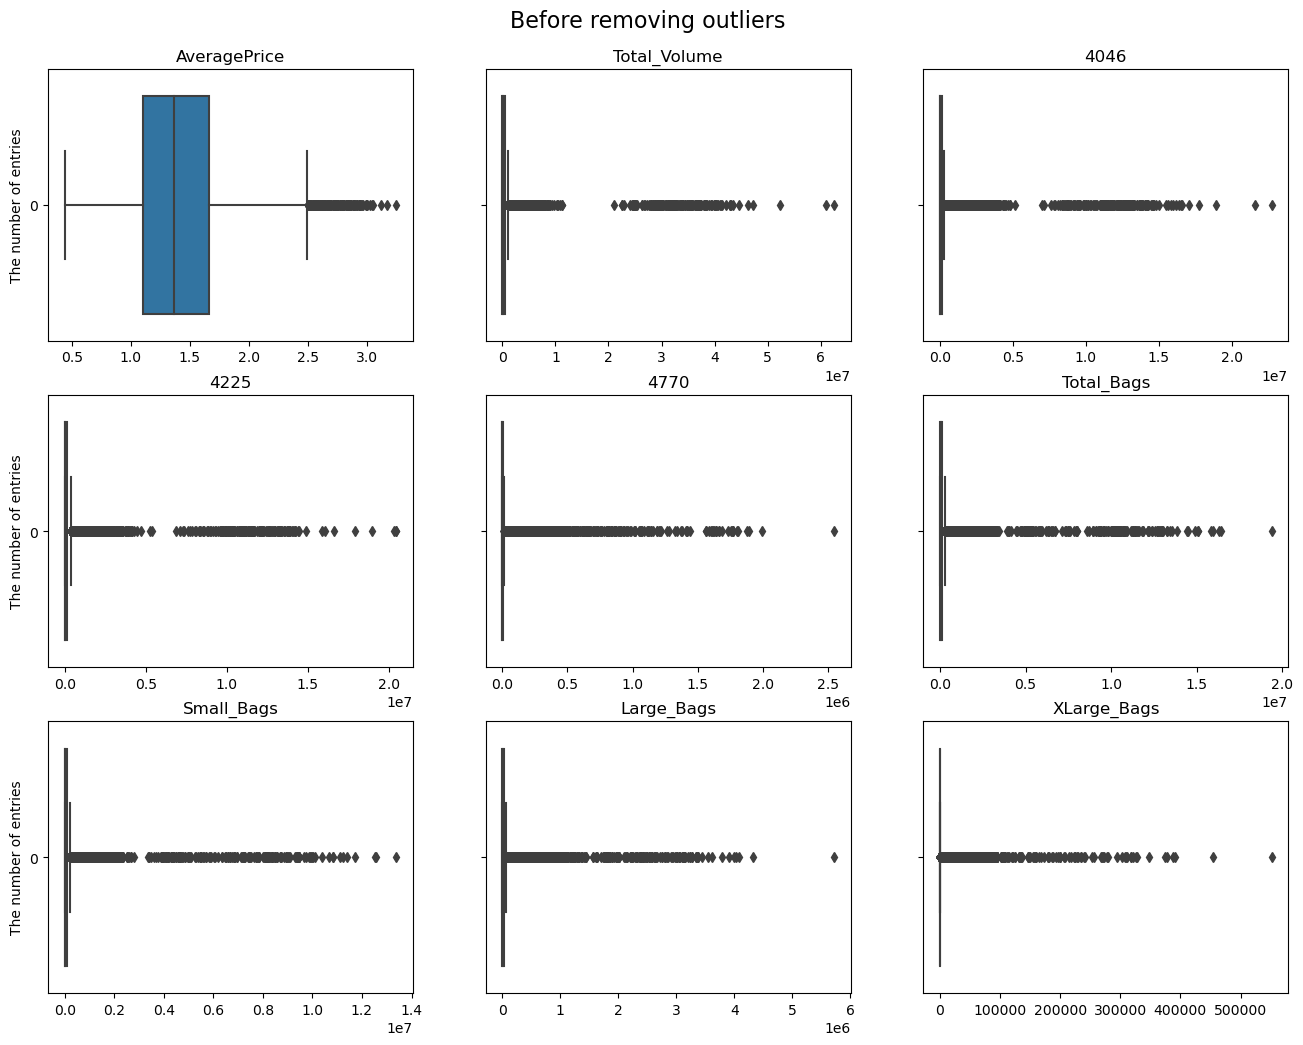

In [12]:
fig, axs = plt.subplots(3,3, sharey=True, figsize=(16,12))
fig.suptitle("Before removing outliers",y=0.93, size=16)
axs = axs.flatten()
for i, data in enumerate(numeric_columns):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=df[data], orient='h', ax=axs[i])
        axs[i].set_title(data)

<span style="font-size:18px;">Now that we know our dataset has a lot of outliers, we can use Tukey's Technique to get rid of them.</span>

In [13]:
def IQR_method (df,n, features):
    sum=0
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # set threshold range
        lower_thresh = Q1 - (1.5 * IQR)
        upper_thresh = Q3 + (1.5 * IQR)
        
        # Row number/Index of the observation where the outlier has been found
        outlier_list_column = df[(df[column] <  lower_thresh) | (df[column] > upper_thresh)].index
        
        # appending the list of observations with outliers
        outlier_list.extend(outlier_list_column)

     
    # Creates a dictionary which has the observation/row number as the key and the number of outliers in each row as the value
    outlier_list = Counter(outlier_list) 
       
    #creates a list of observations where No. of outliers>=1
    multiple_outliers = list( k for k, v in outlier_list.items() if v >= n )

    return multiple_outliers

In [14]:
Outliers_IQR = IQR_method(df,1,n_cols)
print("The no. of records before removing outlier are: {}".format(len(df)))
df = df.drop(Outliers_IQR, axis = 0)
print("The no. of records after removing outlier are: {}".format(len(df)))
print("{} outliers have been removed".format(len(Outliers_IQR)))
df

The no. of records before removing outlier are: 18249
The no. of records after removing outlier are: 11538
6711 outliers have been removed


,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


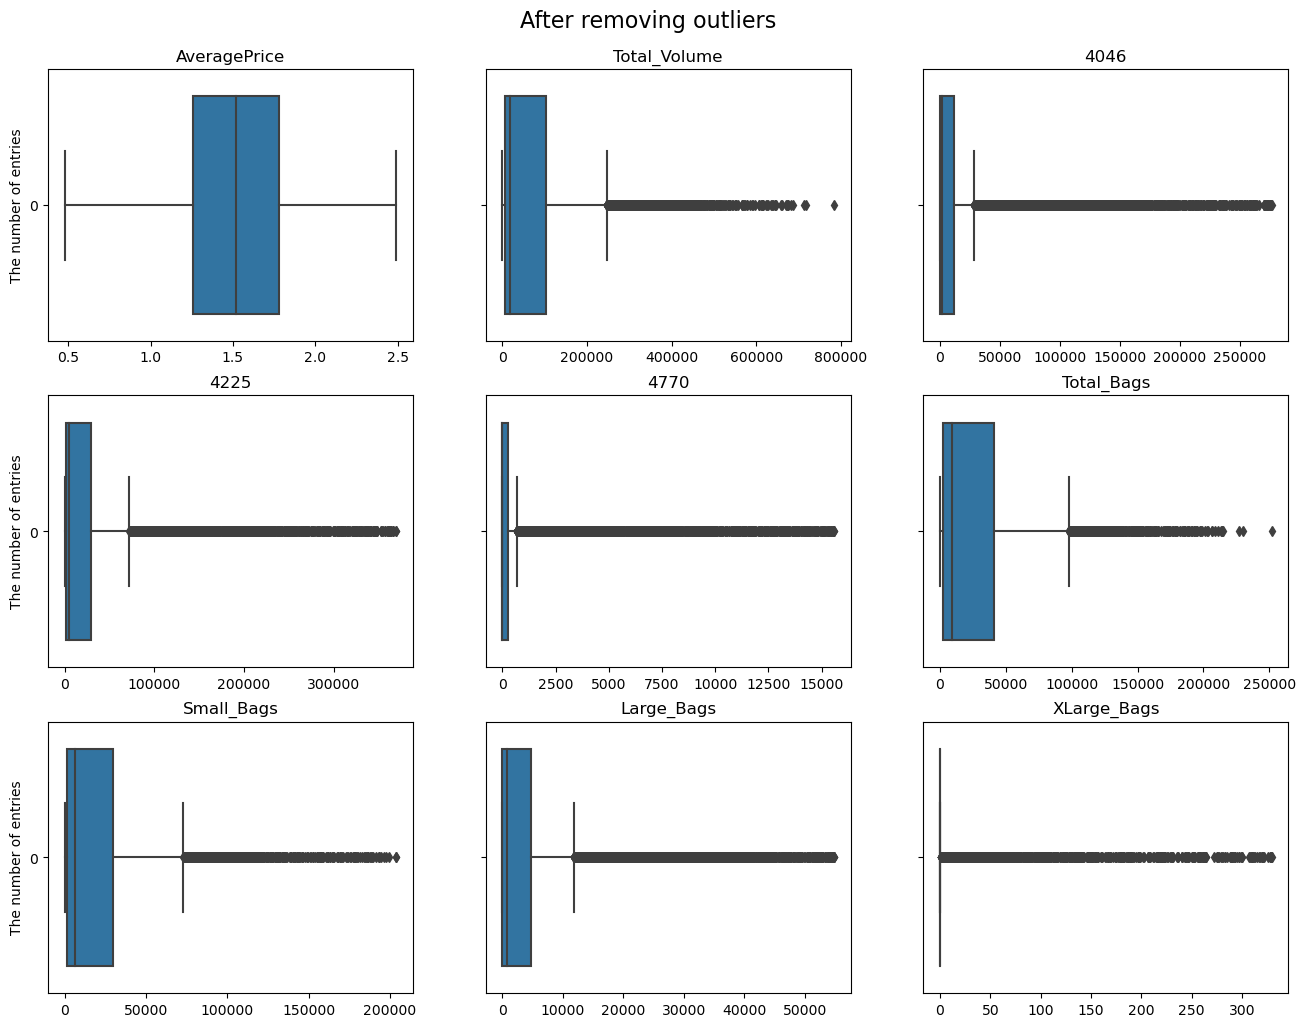

In [15]:
fig, axs = plt.subplots(3,3, sharey=True, figsize=(16,12))
fig.suptitle("After removing outliers",y=0.93, size=16)
axs = axs.flatten()
for i, data in enumerate(numeric_columns):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=df[data], orient='h', ax=axs[i])
        axs[i].set_title(data)

<span style="font-size:18px;">The reason why you see a straight line (over 0.00) in the case of ` XLarge_Bags` is because <span style="background-color:yellow; font-weight:bold">$Q1 = Q3 = IQR = 0$</span>. This is because most of the values of `XLarge_Bags` are 0.</span>

In [16]:
outlier_after=[]
for col in range(9):
    outlier_after.append(outliers_count(df[numeric_columns[col]]))
zipped_list = list(zip(numeric_columns, outlier_after))  # zip the two lists together
result_list = [[item[0], item[1]] for item in zipped_list]  # create a list of lists
df_after =  pd.DataFrame(result_list, columns=["Column", "No. of outliers"])
df_after

,Column,No. of outliers
0,AveragePrice,0
1,Total_Volume,1041
2,4046,2054
3,4225,1229
4,4770,2044
5,Total_Bags,545
6,Small_Bags,840
7,Large_Bags,1604
8,XLarge_Bags,1137


<span style="font-size:18px;">As we can see above, we were able to drop a lot of outliers from our dataset. But we can see that outliers still persist for almost all columns (except AveragePrice). This is because all these columns have a <span style="text-decoration:underline">very wide range of values and it would take a lot of Iterations to completely get rid of all outliers</span> - which will result in the number of observation in our dataset to keep reducing with each iteration. Hence, we only do outlier removal once.</span>

<span style="font-size:18px;">The reason why AveragePrice has no outliers is because the values are well spread (normally distributed).</span>

### 3.5 Transformation

<span style="font-size:18px;">Since we still have a lot of outliers in our dataset, skewness will be there. <span style="font-weight:bold">Skewness</span> is the measure of the asymmetry of a probability distribution. In a normal distribution, the skewness is 0, meaning the distribution is symmetrical. However, if a dataset is skewed, it means that the data is not symmetrical and is either skewed to the left or right.</span>



<span style="font-size:18px;">The skewness value will determine if our distributon is Postive skew (Right skew), Negative skew (Left skew) or normally distributed.</span>

<span style="font-size:18px;">If this value is between:</span>
- <span style="font-size:18px;"><span style = "font-weight:bold">0.5 and 0.5</span>, the distribution of the value is almost symmetrical</span>
- <span style="font-size:18px;"><span style = "font-weight:bold">1 and -0.5</span>, the data is negatively skewed, and if it is between <span style = "font-weight:bold">0.5 to 1</span>,, the data is positively skewed. The skewness is moderate.</span>
- <span style="font-size:18px;">If the skewness is <span style = "font-weight:bold">lower than -1</span>, (negatively skewed) or<span style = "font-weight:bold"> greater than 1</span> (positively skewed), the data is highly skewed.</span>

In [17]:
old_skew = df2.skew()
old_skew

AveragePrice     0.580303
Total_Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total_Bags       9.756072
Small_Bags       9.540660
Large_Bags       9.796455
XLarge_Bags     13.139751
dtype: float64

<span style="font-size:18px;">After calculating the skewness of each column in our dataset, we can observe that our dataset is <span style="background-color:yellow; font-weight:bold">heavily right skewed</span>. This can be furthered confirmed by drawing a KDE (Kernel Density) plot. </span>

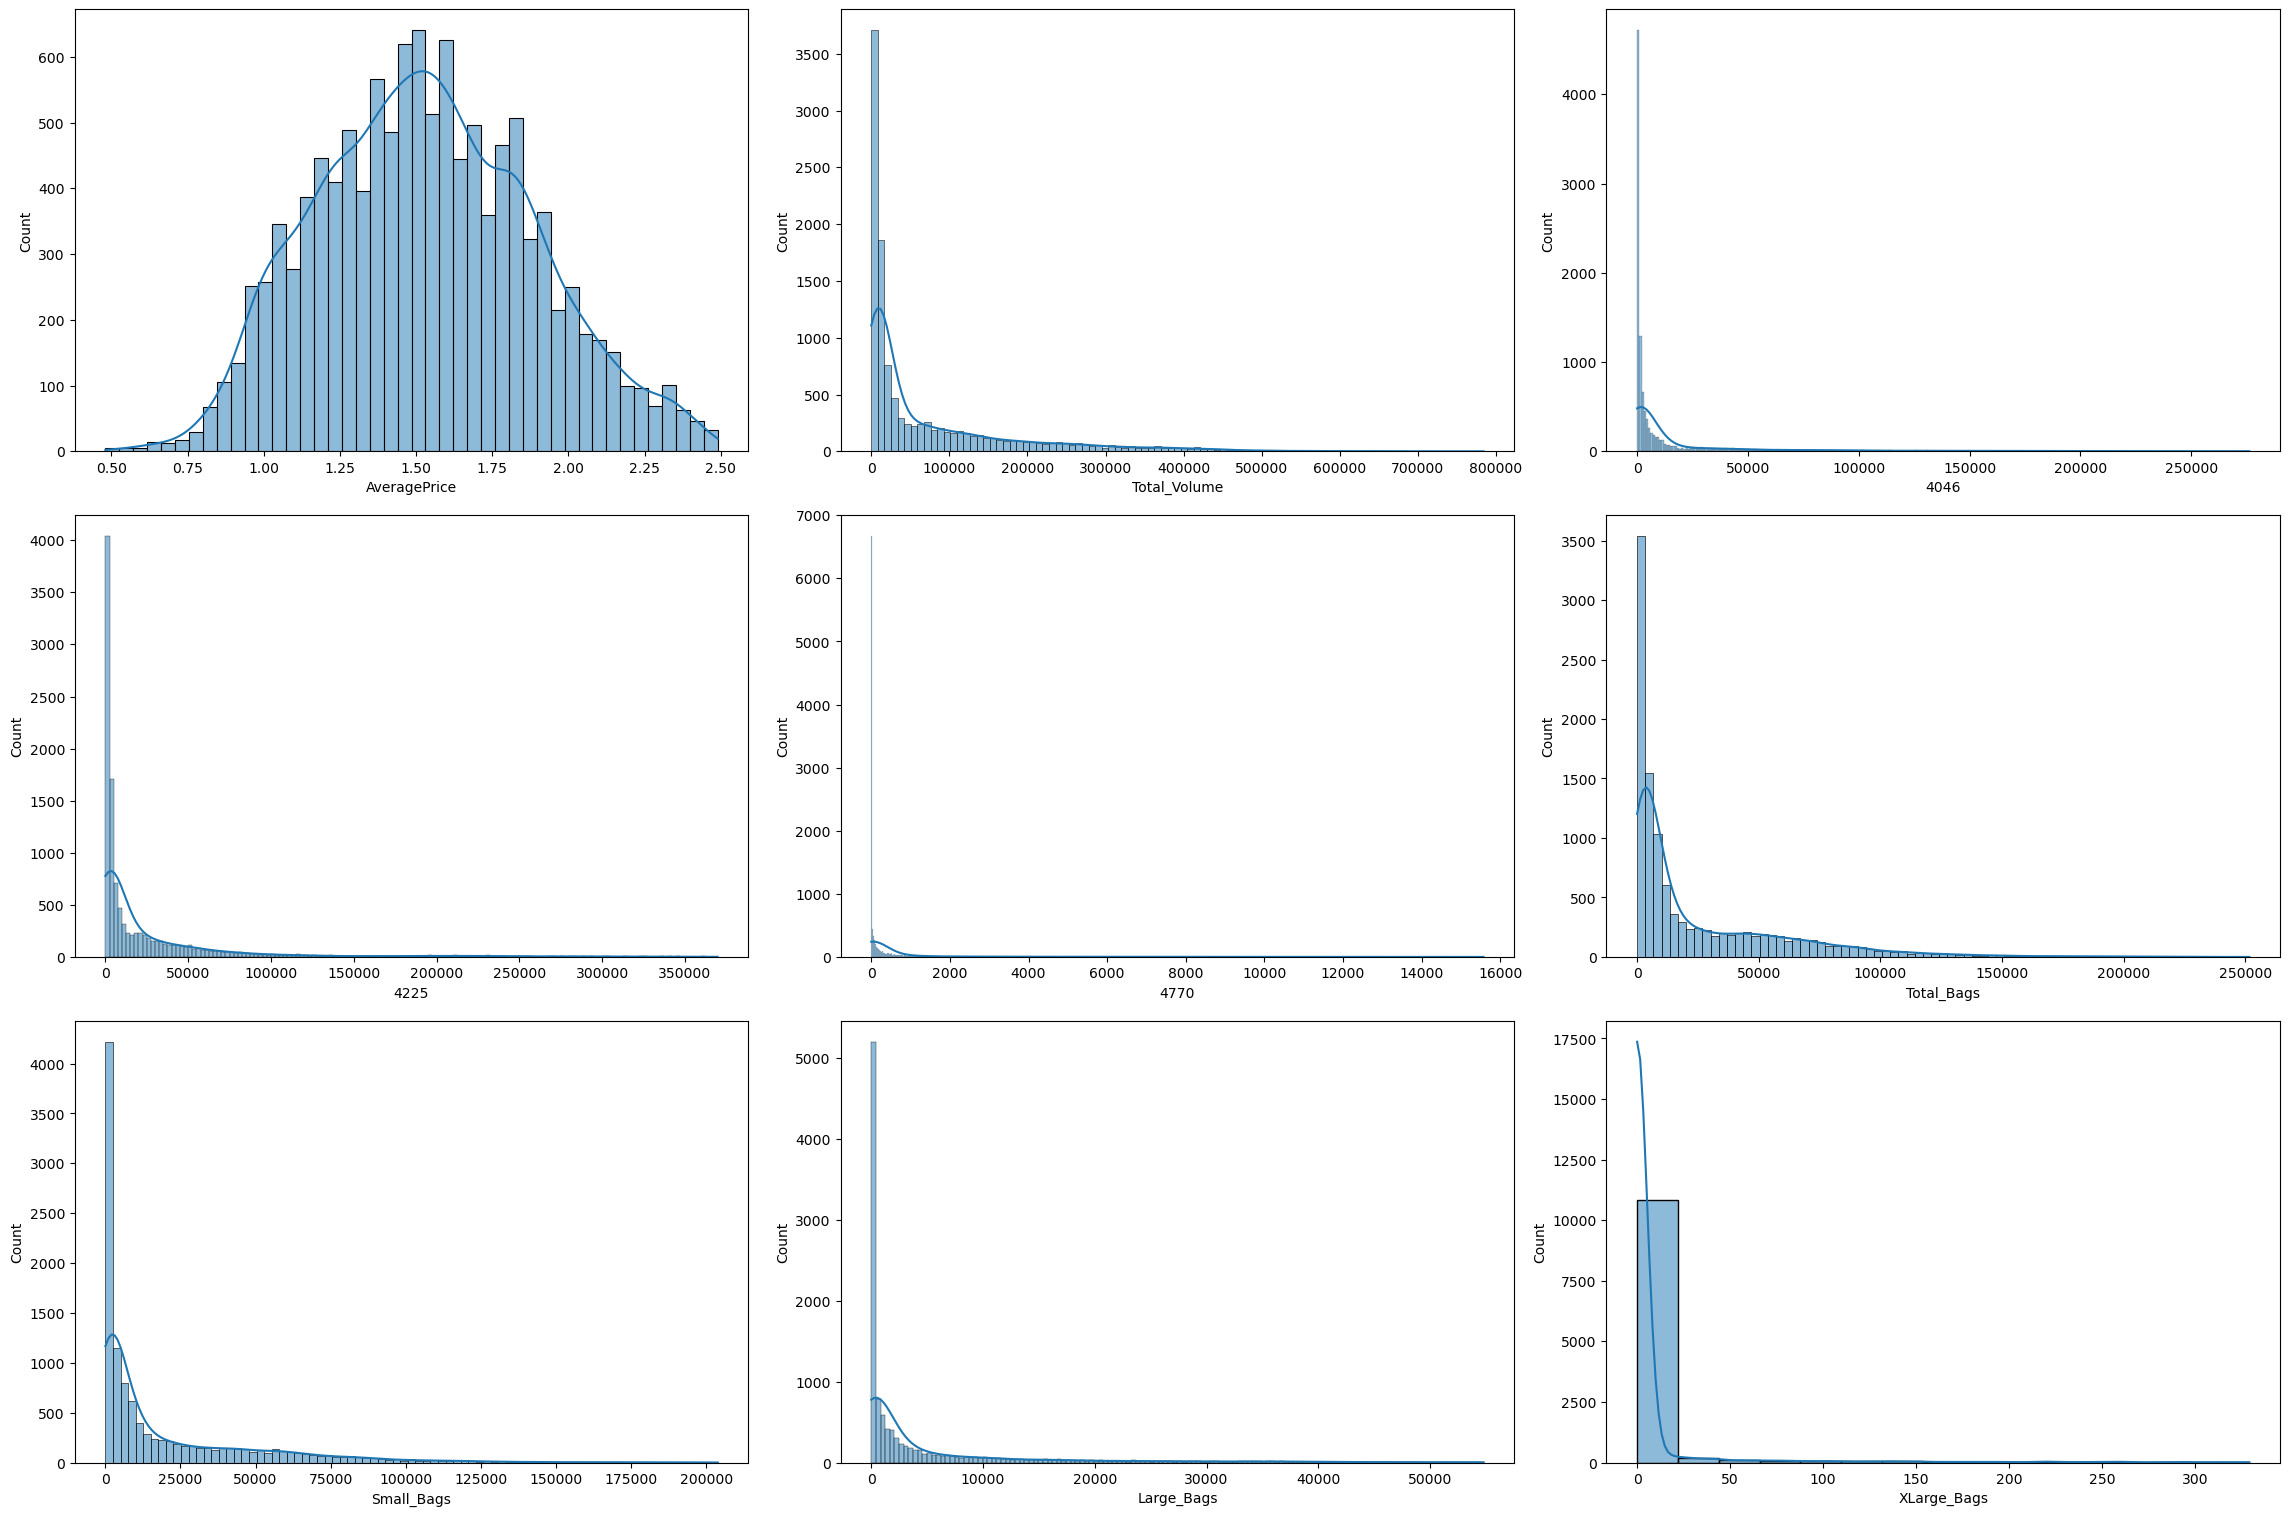

In [18]:
import scipy.stats as stats
plt.figure(figsize=(23,30))
for i in list(enumerate(df2.columns)):
#     print(i[1])
    plt.subplot(6, 3, i[0]+1)
    sns.histplot(data = df[i[1]], kde=True)  # Histogram with KDE line

plt.tight_layout()  
plt.show() 

<span style="font-size:18px;">From the above KDE plot we can concur that only the`AveragePrice` column is nearly normally distributed. The rest of the columns are all skewed to the right. We have to find appropriate ways to handle these skewed data and try to turn them to as normally distributed as possible. This can be done with the help of transformations.</span>

<span style="font-weight:bold; font-size:18px">1. Function Transformers</span>
  - <span style=" font-size:16px">Log Transform</span>
  - <span style=" font-size:16px">Reciprocal Transform</span>
  - <span style=" font-size:16px">Square Transform</span>
  - <span style=" font-size:16px">Square Root Transform</span>
  - <span style=" font-size:16px">Custom Transform</span>
  
<span style="font-weight:bold; font-size:18px"> 2. Power Transformers</span>
  - <span style=" font-size:16px">Box-Cox</span>
  - <span style=" font-size:16px">Yeo-Johnson</span>
  
<span style="font-weight:bold; font-size:18px">3. Quantile Transformers</span>

<span style="font-size:18px">The best suited transformations for Highly right skewed data are - <span style="text-decoration:underline">Log, Square, Box-Cox and Yeo-Johnson Transformation</span>. I tried all the 4 transformation on each column and found out that the <span style="font-weight:bold;text-decoration:underline">Yeo-Johnson Transformation</span> performed the best. It was able to bring down the skewness of most columns to under 0.5</span>

In [19]:
df

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [20]:
yeojohnTr = PowerTransformer(standardize=True)  
df3=df.copy()

for col in numeric_columns:
      df3[col] =  pd.DataFrame(yeojohnTr.fit_transform(df[col].values.reshape(-1,1)))

<span style="font-size:18px;">Essentialy, what we are trying to do here is normalize the values in each of our columns to a much smaller range using the Yeo-Johnson Transformation so that we can try removing skewness.<span>

In [21]:
skew_val=[]
for col in numeric_columns: 
    skew_val.append((col,df3[col].skew()))
    
# Convert the list of  tuples to a DataFrame with two columns
skw = pd.DataFrame(skew_val, columns=['Column', 'Skewness'])
skw.style.background_gradient(cmap='YlOrRd')

,Column,Skewness
0,AveragePrice,0.015155
1,Total_Volume,0.135206
2,4046,-0.023967
3,4225,0.129626
4,4770,0.332222
5,Total_Bags,-0.107803
6,Small_Bags,-0.160577
7,Large_Bags,-0.172945
8,XLarge_Bags,2.638500


<span style="font-size:18px;">The only column which has significantly high skewness despite applying transformation is the `Xlarge_Bags` column. This high skewness can be explained by the fact that more than 65% of the values in the column are **0.**</span>

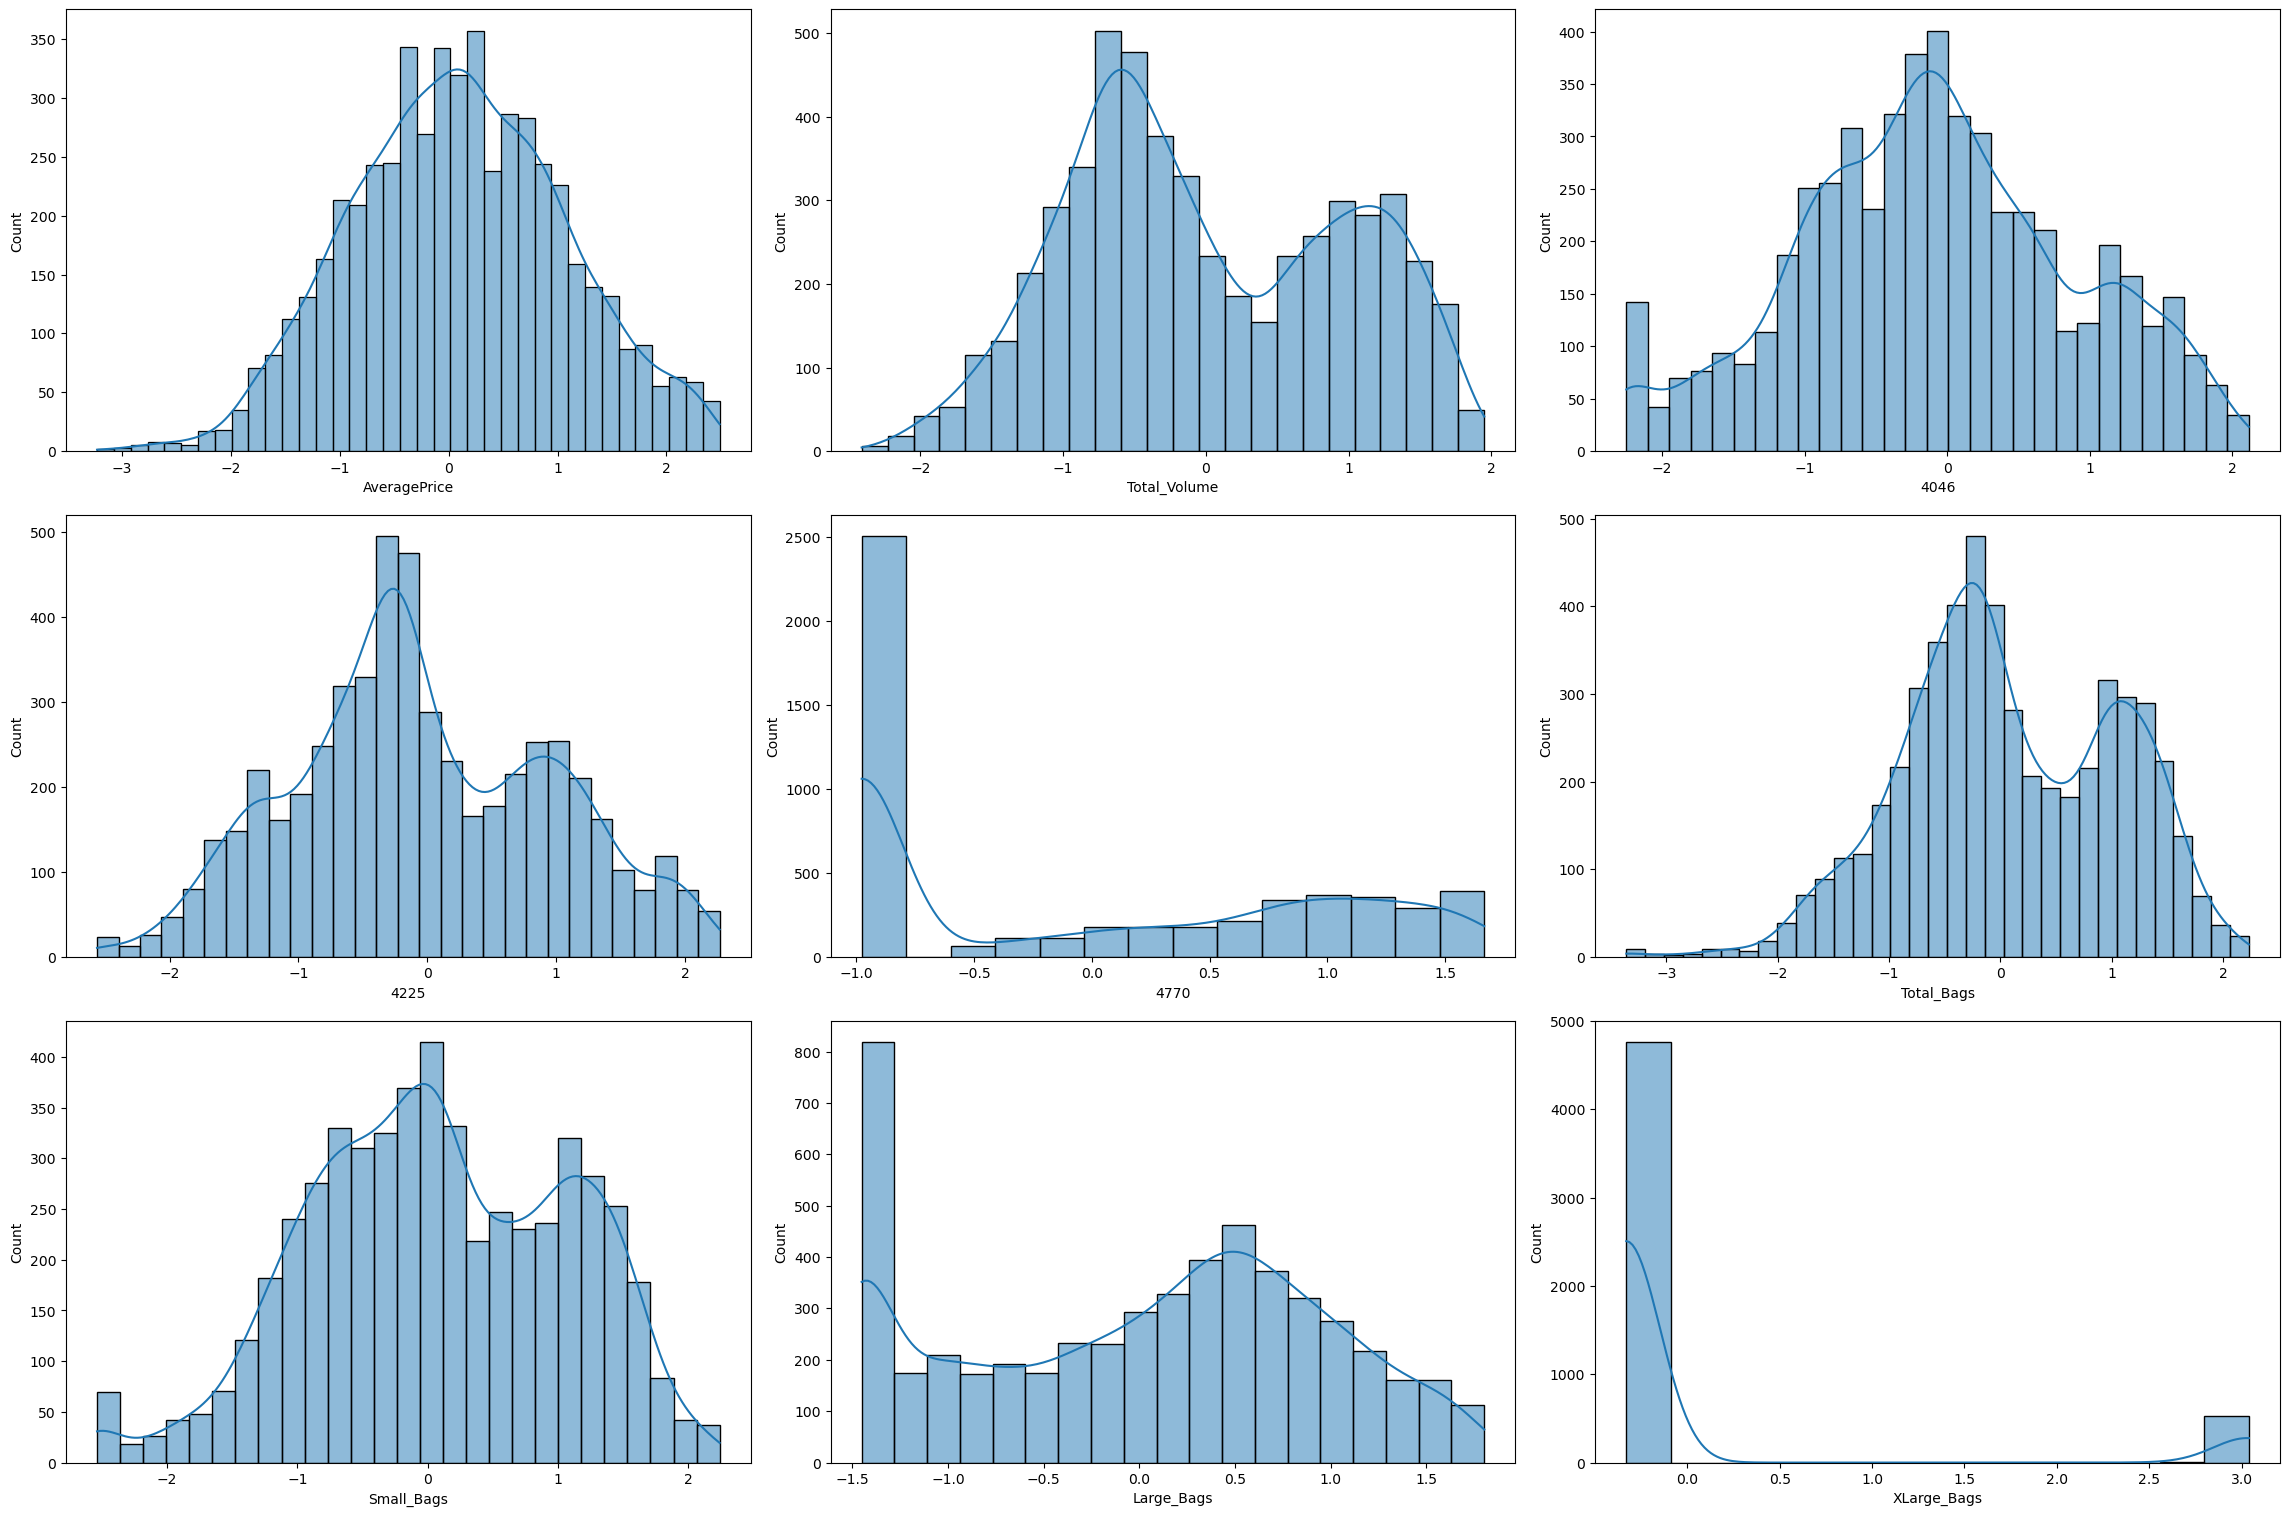

In [22]:
plt.figure(figsize=(23,30))
for i in list(enumerate(df2.columns)):
    plt.subplot(6, 3, i[0]+1)
    sns.histplot(data = df3[i[1]], kde=True)  # Histogram with KDE line

plt.tight_layout()  
plt.show() 

<span style="font-size:18px;">Although we can't say we have obtained perfectly normal distribution for all columns, the Yeo-Johnson transformation was able to introduce near normality for most of our columns.</span>

## 4. Visualization

<span style="font-size:18px;">Now that preprocessing is done, we can perform some EDA to gain some insights from our dataset.</span>

### 4.1 Bar Chart (Volume of Avocados sold across different regions)

In [23]:
# Group the data by 'region' and calculate the sum of 'Total_Volume'
sum_by_region = df.groupby('region').agg({'Total_Volume': 'sum'}).reset_index()
mean_total_volume = sum_by_region['Total_Volume'].mean()


# Create a bar chart with Plotly Express
green_scale = cl.scales['7']['seq']['Greens']
fig = px.bar(sum_by_region, x='region', y='Total_Volume', title="Volume of Avocaodos sold across different regions", color="Total_Volume",
            color_continuous_scale=green_scale)

# Add a horizontal line for the mean of the 'Total_Volume' column
fig.add_shape(
    type='line',
    yref='y', xref='paper',
    y0=mean_total_volume, y1=mean_total_volume,
    x0=0, x1=1,
    line=dict(color='red', width=2, dash='dash')
)

fig.add_annotation(
    x=0, y=mean_total_volume*1.1 ,
    xref='paper', yref='y',
    text='Average Volume',
    showarrow=False,
    font=dict(size=10, color='red')
)

# Set the y-axis label
fig.update_yaxes(title_text='Total Volume')
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(width=1.5, color='black')))
# Show the plot
fig.show()

### 4.2 Sunburst Plot (For above average consumer states)

In [24]:
sum_by_region_above_mean = sum_by_region[sum_by_region['Total_Volume'] > sum_by_region['Total_Volume'].mean()].reset_index().drop(["index"], axis=1)
sum_by_region_above_mean = sum_by_region[sum_by_region['Total_Volume'] > mean_total_volume]

# Create a pie chart with Plotly Express
fig1 = px.sunburst(sum_by_region_above_mean, path=['region'], values='Total_Volume',
                  color='Total_Volume', color_continuous_scale='reds')
# Set the chart title
fig1.update_layout(title_text='Total Volume by Region (Above Mean)')
fig1.update_layout(title_x=0.5)
fig1.update_traces(marker=dict(line=dict(width=1.5, color='black')))

# Show the plot
fig1.show()

<span style="font-size:18px;">We can see that <ins>Philadelphia</ins> is the highest consumer of Avocados</span>

### 4.3 Line Chart (Time Series Line chart for Average Price)

In [25]:
df4 = dfs[['Date', 'AveragePrice', 'type']].copy()
df4['Date'] = pd.to_datetime(df4['Date'])
df4['Date'] = df4['Date'].apply(lambda x: x.strftime('%Y-%m'))
group1 = df4.groupby(['Date', 'type'])
month_avg = pd.DataFrame(group1.aggregate({'AveragePrice': np.mean})).reset_index()

fig = px.line(month_avg, x='Date', y='AveragePrice', color='type', markers='Date', title='Average Price of Avocados (2015-2018)')

highest_index = month_avg["AveragePrice"].idxmax()

fig.add_shape(type="line",
             x0=month_avg.loc[highest_index,"Date"],
             y0=month_avg.loc[highest_index,"AveragePrice"],
             x1=month_avg.loc[highest_index,"Date"],
             y1=0,
             line=dict(color="green", width=3, dash="dash"))

fig.add_trace(
   go.Scatter(
           x=[month_avg.loc[highest_index,"Date"]],
           y=[month_avg.loc[highest_index,"AveragePrice"]],
           mode="text",
           text=[f"Highest: {month_avg.loc[highest_index,'Date']}"],
   )
)

fig.update_layout(title_x=0.5)
fig.show()

### 4.4 Polar Line chart (Fluctuations in Average Price)

In [26]:
dfs1=month_avg.copy()
dfs1['year']=dfs1['Date'].str[:4]
dfs1['Date']=pd.to_datetime(dfs1['Date'])

df_organic = dfs1.loc[dfs1['type']=='organic'].copy()
df_conventional = dfs1.loc[dfs1['type']=='conventional'].copy()

#to create a month column
df_organic['Month']=df_organic['Date'].dt.month.apply(lambda x:calendar.month_name[x]) 
df_conventional['Month']=df_conventional['Date'].dt.month.apply(lambda x:calendar.month_name[x])

df_organic.head()

,Date,type,AveragePrice,year,Month
1,2015-01-01,organic,1.637639,2015,January
3,2015-02-01,organic,1.598565,2015,February
5,2015-03-01,organic,1.634074,2015,March
7,2015-04-01,organic,1.650046,2015,April
9,2015-05-01,organic,1.598852,2015,May


In [27]:
df_conventional.head()

,Date,type,AveragePrice,year,Month
0,2015-01-01,conventional,1.092454,2015,January
2,2015-02-01,conventional,1.055324,2015,February
4,2015-03-01,conventional,1.089889,2015,March
6,2015-04-01,conventional,1.116852,2015,April
8,2015-05-01,conventional,1.090519,2015,May


In [28]:
fig=px.line_polar(df_organic,
                 r='AveragePrice',
                 theta="Month",
                 color="year",
                 line_close=True,
                 color_discrete_sequence=px.colors.sequential.Plasma_r,
                 template='plotly_dark',
                 title="Price Fluctuation in Organic Avocados"

)

fig.update_layout(title_x=0.5)
fig.show()

fig=px.line_polar(df_conventional,
                 r='AveragePrice',
                 theta="Month",
                 color="year",
                 line_close=True,
                 color_discrete_sequence=px.colors.sequential.Plasma_r,
                 template='plotly_dark',
                 title="Price Fluctuation in Conventional Avocados"

)

fig.update_layout(title_x=0.5)
fig.show()

<span style="font-size:18px;">If we compare the polar line charts, we can see that the <span style = "text-decoration:underline">price fluctuations in the case of Conventional Avocados are more than that of Organic Avocados</span>. If we closely observe, the polar lines are tightly coupled along an AveragePrice of 1.5 (for organic avocados). Whereas the polar lines are scattered across a relatively larger range for conventional avocados. <span>

## 5. Conclusion


- <span style="font-size:18px">**Philadelphia** is the <u>state with the most Volume of Avocados sold</u></span>.
- <span style="font-size:18px">**1st September 2017** recorded the <u>highest Average price for both Conventinal and organic avocados</u></span>.
- <span style="font-size:18px">Fluctuations in the price of Conventional Avocados are more than that of Organic avocados</span>.


<span style="font-size:18px;">Thanks for reading. This notebook is still a work in progress. So more changes can be expected in the upcoming weeks. Any suggestions or corrections are more than welcome.</span>
